In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

2023-06-22 12:38:57.627203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# !pip install tensorflow_text
# !pip install tensorflow_hub

In [3]:
import pandas as pd
df=pd.read_csv('/home/codetrade/Downloads/CSV/spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
## Down shempling technique
df_spam=df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [8]:
df_ham=df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [9]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [10]:
df_ham_downsampled

,Category,Message
4217,ham,Er mw im filled tuth is aight
641,ham,Well imma definitely need to restock before th...
3326,ham,Nope... Juz off from work...
1787,ham,Do you know why god created gap between your f...
5230,ham,"Nope, I'm still in the market"
...,...,...
2799,ham,Purity of friendship between two is not about ...
2748,ham,Ya had just now.onion roast.
1800,ham,"If we hit it off, you can move in with me :)"
3440,ham,"awesome, how do I deal with the gate? Charles ..."


In [11]:
df_balanced = pd.concat([df_spam,df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [12]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [13]:
df_balanced.sample(10)

,Category,Message
1326,ham,Yeah jay's sort of a fucking retard
2863,spam,Adult 18 Content Your video will be with you s...
1745,spam,Someone has conacted our dating service and en...
1659,spam,RGENT! This is the 2nd attempt to contact U!U ...
4676,spam,"Hi babe its Chloe, how r u? I was smashed on s..."
1437,ham,I jus hope its true that missin me cos i'm re...
1726,ham,You know there is. I shall speak to you in &l...
4462,ham,Thanks again for your reply today. When is ur ...
2719,spam,18 days to Euro2004 kickoff! U will be kept in...
1882,ham,Ok.. Ü finishing soon?


In [14]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
2128,ham,Tessy..pls do me a favor. Pls convey my birthd...,0
1800,ham,"If we hit it off, you can move in with me :)",0
4914,spam,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...",1
803,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,1
2856,ham,Your gonna be the death if me. I'm gonna leave...,0
2464,ham,"Good afternoon, babe. How goes that day ? Any ...",0
2970,ham,Ma head dey swell oh. Thanks for making my day,0
2548,spam,"Text82228>> Get more ringtones, logos and game...",1
1091,spam,WIN URGENT! Your mobile number has been awarde...,1
3646,spam,wamma get laid?want real doggin locations sent...,1


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [16]:
X_train.head(4)

900     Your free ringtone is waiting to be collected....
4134    FreeMsg Today's the day if you are ready! I'm ...
4249    accordingly. I repeat, just text the word ok o...
5248               U come n search tat vid..not finishd..
Name: Message, dtype: object

In [17]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2023-06-22 12:39:01.589854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-06-22 12:39:01.590495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-06-22 12:39:01.590641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-06-22 12:39:01.591114: I tensorflow/core/

In [18]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [19]:
get_sentence_embeding(["500$ discount. hurry up",
                       "Bhavin, are you up for a volleybal game tomorrow?"
                      ])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.51327276, -0.8884572 , ..., -0.7474888 ,
        -0.7531474 ,  0.91964495],
       [-0.8720837 , -0.5054399 , -0.9444668 , ..., -0.8584752 ,
        -0.71745366,  0.8808299 ]], dtype=float32)>

In [20]:
df_n = df.head(3)
df_n

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


#### Get embeding vectors for few sample words. Compare them using cosine similarity

In [21]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [22]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.760692  , -0.14219393,  0.49604544, ...,  0.42165297,
        -0.5322142 ,  0.8031219 ],
       [-0.8602322 , -0.2124296 ,  0.49156868, ...,  0.3979799 ,
        -0.6050631 ,  0.84471667],
       [-0.71288615, -0.15463905,  0.38401687, ...,  0.3527874 ,
        -0.5099133 ,  0.734741  ],
       [-0.8253347 , -0.35550562, -0.5906966 , ..., -0.01613653,
        -0.6141757 ,  0.8723029 ],
       [-0.75041354, -0.2681261 , -0.2668967 , ...,  0.02839418,
        -0.5938101 ,  0.797499  ],
       [-0.78544354, -0.29949674,  0.41027415, ...,  0.5222538 ,
        -0.4957355 ,  0.8150749 ]], dtype=float32)>

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])
 
# Compair with the 'banana' vs 'grapes' similarity = 99%

array([[0.9911088]], dtype=float32)

In [24]:
cosine_similarity([e[3]],[e[4]])

array([[0.9872035]], dtype=float32)

In [25]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

2023-06-22 12:39:13.061590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-06-22 12:39:13.089560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-06-22 12:39:13.214798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-06-22 1

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [27]:
len(X_train)

1120

In [28]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
    
]

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)
model.fit(X_train, y_train, epochs=5)

In [30]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-06-22 12:39:17.001920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_3}}]]
2023-06-22 12:39:17.002023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/bert_encoder/StatefulPartitionedCall_grad/bert_encoder/StatefulPartitionedCall_4}}]]
2023

2023-06-22 12:39:17.523215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-06-22 12:39:17.523321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-06-22 12:39:17.523386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

2023-06-22 12:39:18.059741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-06-22 12:39:18.059848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,768]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-06-22 12:39:18.059912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

35/35 [==============================] - 203s 6s/step - loss: 0.6484 - accuracy: 0.6420 - precision: 0.6443 - recall: 0.6339
Epoch 2/5
35/35 [==============================] - 197s 6s/step - loss: 0.5195 - accuracy: 0.8143 - precision: 0.7983 - recall: 0.8411
Epoch 3/5
35/35 [==============================] - 204s 6s/step - loss: 0.4435 - accuracy: 0.8554 - precision: 0.8592 - recall: 0.8500
Epoch 4/5
35/35 [==============================] - 203s 6s/step - loss: 0.3962 - accuracy: 0.8813 - precision: 0.8600 - recall: 0.9107
Epoch 5/5
35/35 [==============================] - 204s 6s/step - loss: 0.3662 - accuracy: 0.8893 - precision: 0.8825 - recall: 0.8982


In [31]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 70s 6s/step - loss: 0.3494 - accuracy: 0.8850 - precision: 0.8871 - recall: 0.8824


[0.3494117856025696, 0.885026752948761, 0.8870967626571655, 0.8823529481887817]

In [35]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 67s 6s/step


In [36]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_predicted)
cm

array([[166,  21],
       [ 22, 165]])

Text(50.722222222222214, 0.5, 'Truth')

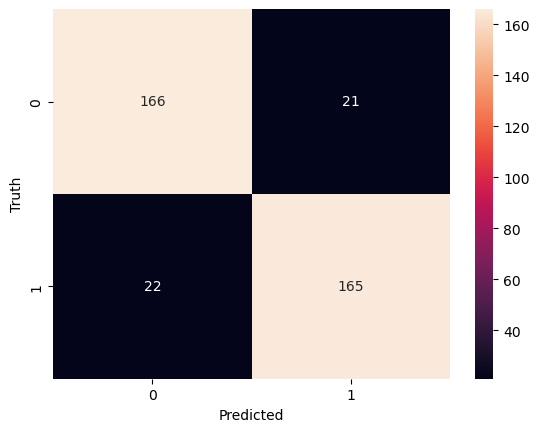

In [38]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 2s 2s/step


array([[0.6382397 ],
       [0.7051534 ],
       [0.7036801 ],
       [0.23408161],
       [0.16164836]], dtype=float32)